In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson, gamma, expon, binom, norm
from utils import *

sns.set_style("whitegrid")

In [41]:
def prob_correct(ability, difficulty):
    a = 100
    c = 0.25
    x = (ability - difficulty) / a
    p = c + (1-c) / (1 + np.exp(-x))
    return p


def play(ability, difficulty):
    p = prob_correct(ability, difficulty)
    return np.random.random() < p


def update_ability(belief, data):
    diff, outcome = data
    ps = prob_correct(belief.index.values, diff)
    if outcome:
        likelihood = ps
    else:
        likelihood = 1 - ps
    
    posterior = update_prior(belief, likelihood)
    return posterior

_difficulties = np.linspace(200, 800, 101)
def choose(i, belief, style='constant'):
    if style == 'constant':
        return 500
    elif style == 'gradual':
        return _difficulties[i]
    elif style == 'adaptive':
        return dist_mean(belief)
    else:
        raise TypeError


def simulate_test(actual_ability, style='constant'):
    posterior = prior.copy()
    trace = pd.DataFrame(columns=['difficulty', 'outcome'])

    for i in range(num_questions):
        difficulty = choose(i, posterior, style=style)
        outcome = play(actual_ability, difficulty) 
        data = difficulty, outcome
        posterior = update_ability(posterior, data)
        trace.loc[i] = data
    
    return posterior, trace

<AxesSubplot:>

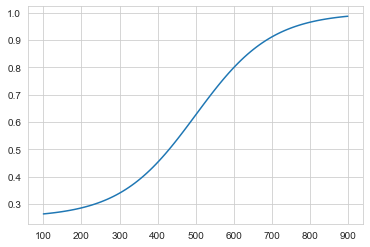

In [3]:
# model of ability - correct % map
abilities = np.linspace(100, 900, 101)
diff = 500
pmf = pd.Series(prob_correct(abilities, diff), index=abilities)
pmf.plot()

<AxesSubplot:>

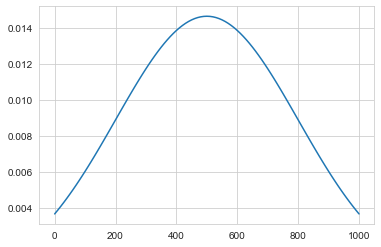

In [4]:
# SAT score is the estimate of ability
# modeling prior
hypos = np.linspace(0, 1000, 101)
ps = norm(500, 300).pdf(hypos)
prior = normalize_dist(pd.Series(ps, index=hypos))

prior.plot()

717.8111601197925


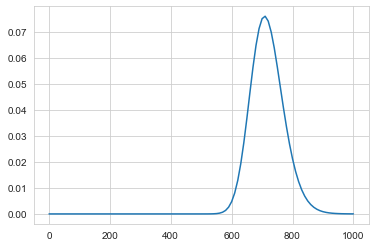

In [40]:
ability = 700
num_questions = 51

posterior, trace = simulate_test(ability)
posterior.plot()
print(dist_mean(posterior))

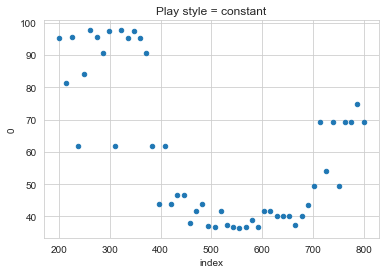

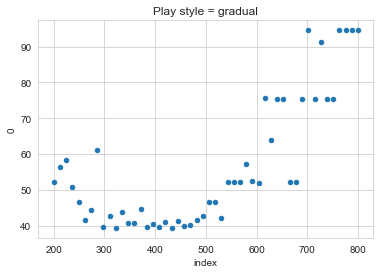

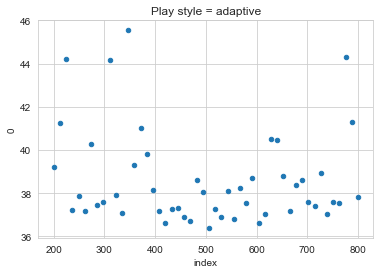

In [42]:
for style in ['constant','gradual','adaptive']:
    actual_abilties = np.linspace(200, 800)
    results = {}
    for aa in actual_abilties:
        posterior, trace = simulate_test(aa, style=style)
        results[aa] = dist_moment(posterior, 2)

    pmf = pd.Series(results).sort_index()
    pmf.reset_index().plot('index', 0, kind='scatter')
    plt.title(f'Play style = {style}')
    plt.show()